# Com S 574 - HW 3
### Miles Lucas
*Iowa State University*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

In [3]:
sns.set(style='whitegrid')
plot_params = {
    'figure.figsize': (10, 7)
}
rcParams.update(plot_params)

## Problem 1

Starting with Bayes' theorem

$$
    p(y=k | x) \propto p(x | y=k) p(y=k)
$$

$$
 p(x | k) = p(x | \mu_k, \sigma^2_k) = \frac{1}{\sqrt{2\pi \sigma^2_k}} \exp \left[-\frac12 \frac{(x-\mu_k)^2}{\sigma_k^2} \right]
$$

$$
p(y=k) = \pi_k
$$

$$
p(y=k | x) \propto \frac{\pi_k}{\sqrt{2\pi \sigma^2_k}} \exp \left[-\frac12 \frac{(x-\mu_k)^2}{\sigma_k^2} \right]
$$

Now for MLE we can take this and throw away any terms that are constant for all classes. In addition we will take the natural logarithm to help simplify and provide easier numbers for the numerical MLE solvers.

\begin{align}
    \ln{p_k} &= \ln{\pi_k} - \frac12\ln{2\pi} - \ln{\sigma_k} - \frac12 \left[ \frac{(x-\mu_k)^2}{\sigma_k^2} \right] \\
             &= \ln{\pi_k} - \ln{\sigma_k} - \frac{1}{2\sigma_k^2} \left(x^2 -2x\mu_k + \mu_k^2  \right)
\end{align}

This first two terms are a class specific constant and the third term is a quadratic response to each class given the independent predictor vector $x$. 

In the case where $\sigma_k^2 = \sigma^2$ is constant for all classes, the second term gets tossed away as well as the $x^2/\sigma^2$ term, because it is constant for all classes. If we toss those out we get the same result as LDA.

## Problem 2

\begin{equation*}
    p_y(4) = \frac{0.8 \cdot N(4 | 10, 36)}{0.8 \cdot N(4 | 10, 36) + 0.2\cdot N(4 | 0, 36)}
\end{equation*}

In [4]:
0.8 * st.norm.pdf(4, 10, 6) / (0.8 * st.norm.pdf(4, 10, 6) + 0.2 * st.norm.pdf(4, 0, 6))

0.7518524532975261

## Problem 3

 Load the dataset

In [5]:
data = pd.read_csv('data/Weekly.csv', index_col=0)
data.Direction = data.Direction.astype('category')
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [6]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


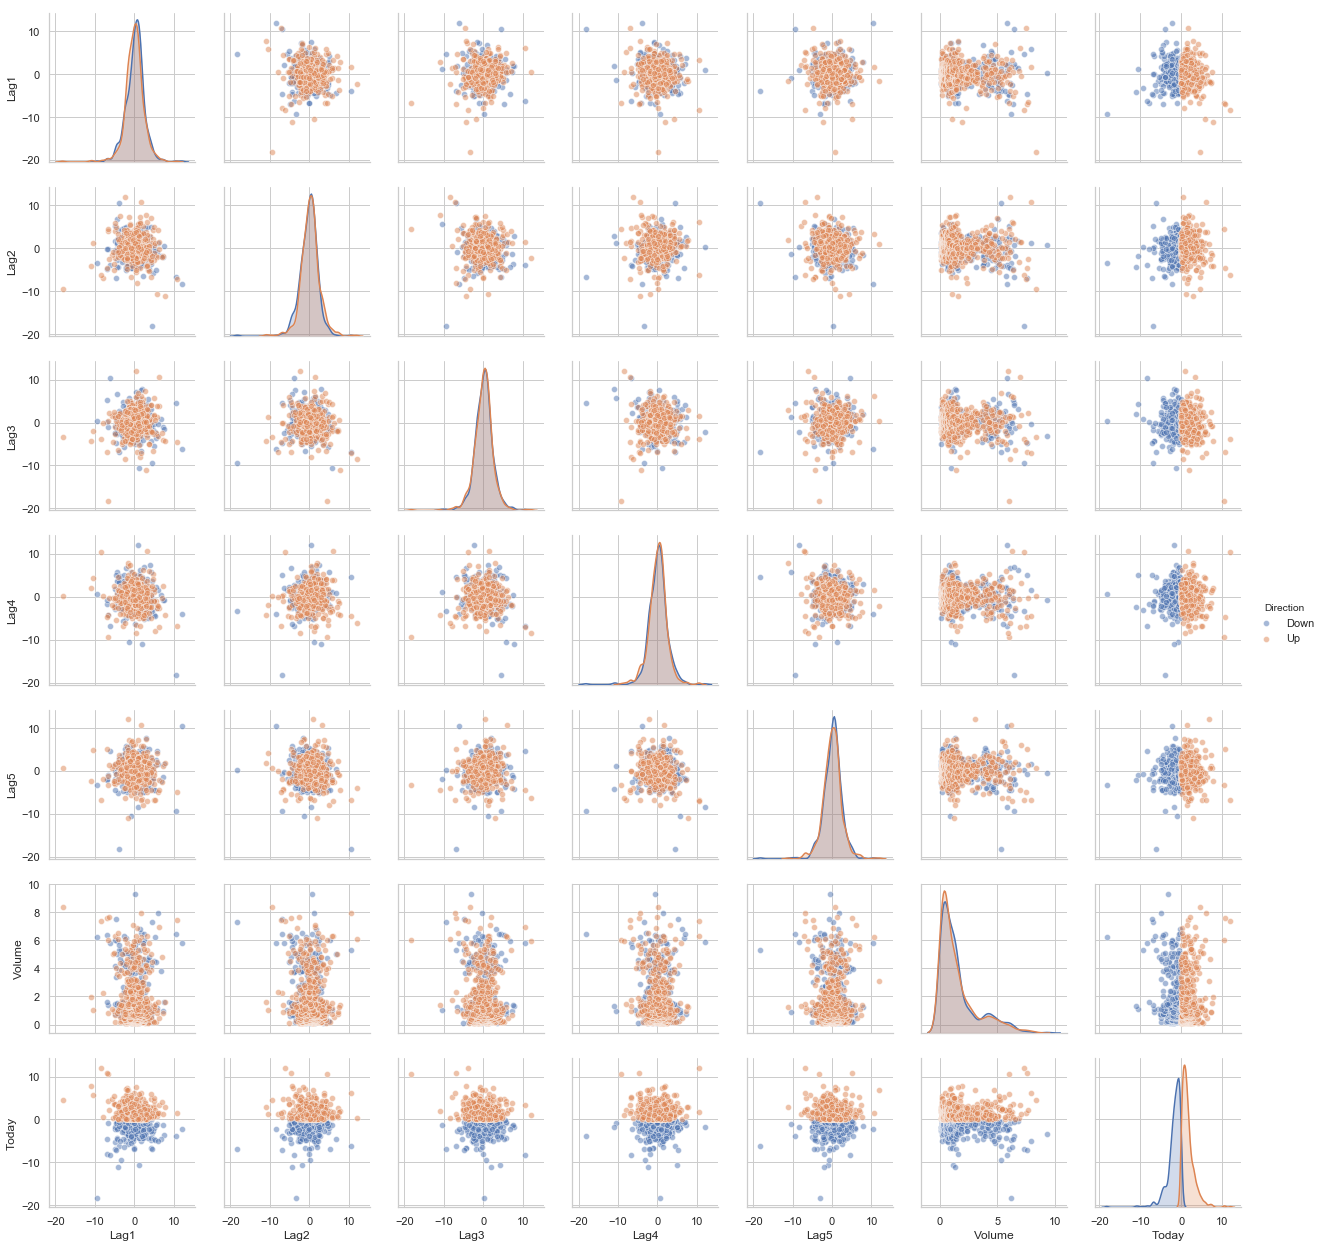

In [7]:
sns.pairplot(data=data.drop('Year', axis=1), hue='Direction', plot_kws=dict(alpha=0.5));

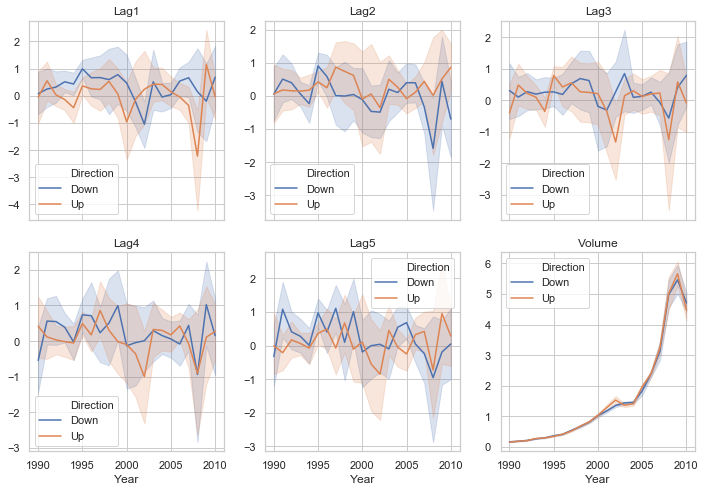

In [8]:
fig, axes = plt.subplots(2, 3, sharex=True)
sns.lineplot(x='Year', y='Lag1', hue='Direction', data=data, ax=axes[0, 0])
sns.lineplot(x='Year', y='Lag2', hue='Direction', data=data, ax=axes[0, 1])
sns.lineplot(x='Year', y='Lag3', hue='Direction', data=data, ax=axes[0, 2])
sns.lineplot(x='Year', y='Lag4', hue='Direction', data=data, ax=axes[1, 0])
sns.lineplot(x='Year', y='Lag5', hue='Direction', data=data, ax=axes[1, 1])
sns.lineplot(x='Year', y='Volume', hue='Direction', data=data, ax=axes[1, 2])

titles = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
[ax.set_title(title) for ax, title in zip(axes.ravel(), titles)]
[ax.set_xlabel(None) for ax in axes[0]]
[ax.set_ylabel(None) for ax in axes.ravel()]
plt.tight_layout()

In [9]:
data.drop('Year', axis=1).corr()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


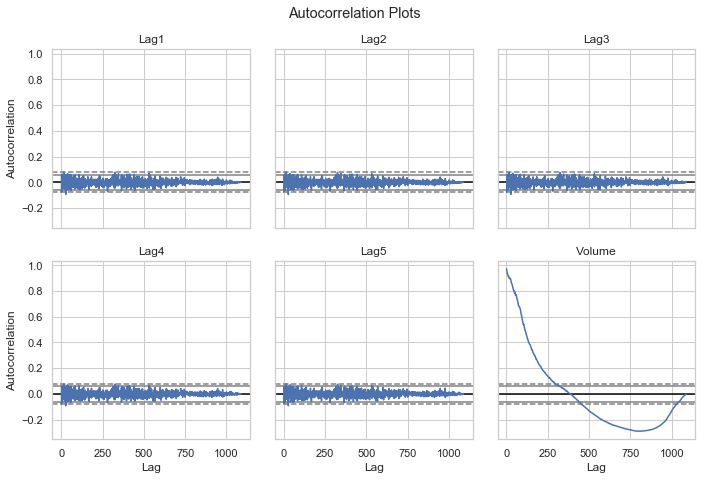

In [10]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
pd.plotting.autocorrelation_plot(data['Lag1'], ax=axes[0, 0])
pd.plotting.autocorrelation_plot(data['Lag2'], ax=axes[0, 1])
pd.plotting.autocorrelation_plot(data['Lag3'], ax=axes[0, 2])
pd.plotting.autocorrelation_plot(data['Lag4'], ax=axes[1, 0])
pd.plotting.autocorrelation_plot(data['Lag5'], ax=axes[1, 1])
pd.plotting.autocorrelation_plot(data['Volume'], ax=axes[1, 2])

titles = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
[ax.set_title(title) for ax, title in zip(axes.ravel(), titles)]
[ax.set_xlabel(None) for ax in axes[0]]
[ax.set_ylabel(None) for ax in axes[:, 1:3].ravel()]
[ax.grid(True) for ax in axes.ravel()]
plt.suptitle('Autocorrelation Plots')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Looking at these summaries and plots the most obvious correlation is with `Direction` and `Today`, which makes sense since `Direction` is just the sign of `Today`. Otherwise there is not anything jumping out to me.

#### b.

In [11]:
model = smf.glm('Direction ~ Volume + Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=data, family=sm.families.Binomial()).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Tue, 16 Apr 2019   Deviance:                       1486.4
Time:                                          15:46:45   Pearson chi2:                 1.09e+03
No. Iterations:                                       4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002      -0.435      -0.098
Volume         0.0227      0.037      0.616      0.538      -0.050       0.095
Lag1           0.0413      0.026      1.563      0.118      -0.010       0.093
Lag2          -0.0584      0.027     -2.175      0.030      -0.111      -0.006
Lag3           0.0161      0.027      0.602      0.547      -0.036       0.068
Lag4           0.0278      0.026      1.050      0.294      -0.024       0.080
Lag5           0.0145      0.026      0.549      0.583      -0.037       0.066
==============================================================================
"""

This summary output shows that only the intercept and the Lag2 predictors have significance for $\alpha$=0.05.

#### c.

In [13]:
predicted = ['Down' if p > 0.5 else 'Up' for p in model.predict()]

In [14]:
cm = confusion_matrix(data.Direction, predicted)
cm

array([[ 54, 430],
       [ 48, 557]])

In [15]:
np.trace(cm) / np.sum(cm)

0.5610651974288338

#### d.

In [16]:
mask = (data.Year >= 1990) & (data.Year <= 2008)
train = data[mask]
test = data[~mask]
model2 = smf.glm('Direction ~ Lag2', data=train, family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      983
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -675.27
Date:                                  Tue, 16 Apr 2019   Deviance:                       1350.5
Time:                                          15:46:46   Pearson chi2:                     985.
No. Iterations:                                       4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2033      0.064     -3.162      0.002      -0.329      -0.077
Lag2          -0.0581      0.029     -2.024      0.043      -0.114      -0.002
==============================================================================
"""

In [17]:
test_pred = ['Down' if p > 0.5 else 'Up' for p in model2.predict(test)]
cm2 = confusion_matrix(test.Direction, test_pred)
cm2

array([[ 9, 34],
       [ 5, 56]])

In [18]:
np.trace(cm2) / np.sum(cm2)

0.625

#### e.

In [19]:
lda = LinearDiscriminantAnalysis().fit(train[['Lag2']], train.Direction)

In [20]:
lda_pred = lda.predict(test[['Lag2']])
cm_lda = confusion_matrix(test.Direction, lda_pred)
cm_lda

array([[ 9, 34],
       [ 5, 56]])

In [21]:
np.trace(cm_lda) / np.sum(cm_lda)

0.625

#### f.

In [22]:
qda = QuadraticDiscriminantAnalysis().fit(train[['Lag2']], train.Direction)

In [23]:
qda_pred = qda.predict(test[['Lag2']])
cm_qda = confusion_matrix(test.Direction, qda_pred)
cm_qda

array([[ 0, 43],
       [ 0, 61]])

In [24]:
np.trace(cm_qda) / np.sum(cm_qda)

0.5865384615384616

#### g.

To test whether QDA is justified we want to see whether there is a statistically significant difference in the variance of our class predictors

In [25]:
v1 = data[data.Direction == 'Down'].Lag2
v2 = data[data.Direction == 'Up'].Lag2

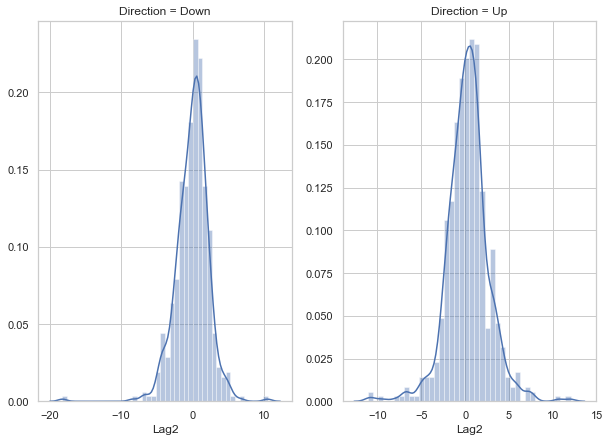

In [26]:
fig, axes = plt.subplots(1, 2)
sns.distplot(v1, ax=axes[0])
sns.distplot(v2, ax=axes[1])
axes[0].set_title('Direction = Down')
axes[1].set_title('Direction = Up');

First, I will test for normality in the samples using Lilliefors Test

In [27]:
lilliefors(v1)

(0.05857652104174127, 0.0004294400595662377)

In [28]:
lilliefors(v2)

(0.06893613718391245, 3.25075277706235e-07)

This p-value (the second output above) is statistically significant for $\alpha$=0.05 for both samples, so neither is normally distributed. Given that, I will use Levene's test (could use Bartlett's test but online documentation suggested Levene's is more robust to non-normal samples)

In [29]:
st.levene(v1, v2)

LeveneResult(statistic=0.46707666150481125, pvalue=0.4944807699826943)

This p-value is ~0.5 so we do not reject the null hypothesis that the sample's variances are different. This means we don't really have good justification for using QDA over LDA. In addition the non-normality shown by Lilliefors' tests raises issues with using discriminant analysis at all for this data.

#### h.

In [30]:
knn = KNeighborsClassifier(n_neighbors=1).fit(train[['Lag2']], train.Direction)

In [31]:
knn_pred = knn.predict(test[['Lag2']])
cm_knn = confusion_matrix(test.Direction, knn_pred)
cm_knn

array([[21, 22],
       [31, 30]])

In [32]:
np.trace(cm_knn) / np.sum(cm_knn)

0.49038461538461536

#### i.
Looking only at the proportion of correct predictions, it seems like both Logistic Regression of `Direction~Lag2` and LDA have the best performance, although our assumption of normality for LDA is invalid.

#### j.

Well, we are using time series data for classification, it's possible we could create some latent variaibles to use for classification, or perhaps a neural network. We could test using other simple classifiers like random forest or SVM. We could pre-process the data to try and effect more of a response from different variables.